<a href="https://colab.research.google.com/github/mikecchau/Utilizing-LinearSVM-for-stroke-prediction/blob/main/SVM_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init

Reinitialized existing Git repository in /content/.git/


In [2]:
!git clone https://github.com/mikecchau/Utilizing-LinearSVM-for-stroke-prediction

fatal: destination path 'Utilizing-LinearSVM-for-stroke-prediction' already exists and is not an empty directory.


In [3]:
%cd /content/Utilizing-LinearSVM-for-stroke-prediction/Data

/content/Utilizing-LinearSVM-for-stroke-prediction/Data


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # For suppressing warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
df.shape

(5110, 12)

In [7]:
df = df.drop('id', axis=1)


Drop 'id' column

In [8]:
df.tail(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5090,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5091,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5092,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5093,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5094,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5096,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


It appears that there are some missing values in this dataset.

In [9]:
df['stroke'].isnull().sum()

0

There are no missing labels in the dataset.

In [10]:
# Create features matrix
X = df.drop('stroke', axis=1)

In [11]:
# Create label matrix
y = df['stroke']

In [12]:
# Check for missing values in columns
for x in X:
  print(df[x].isnull().sum())

0
0
0
0
0
0
0
0
201
0


This indicates that there are 201 missing values within the 'bmi' column.

In [13]:
# Fill missing 'bmi' values with mean
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [14]:
# Recheck for missing values
df.isnull().values.any()

False

## Exploratory Data Analysis

Explanation of feature data (sourced from Kaggle):

* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
* 12) stroke: 1 if the patient had a stroke or 0 if not

Number of patients that had stroke:  249
Number of patients that did not have stroke:  4861


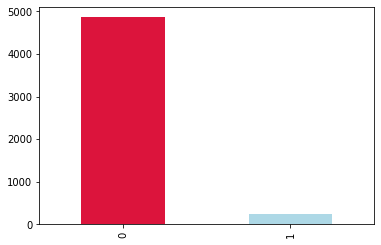

In [15]:
print('Number of patients that had stroke: ', len(df[df['stroke'] == 1]))
print('Number of patients that did not have stroke: ', len(df[df['stroke'] == 0]))
df.stroke.value_counts().plot(kind='bar', color=["crimson", "lightblue"])

The data is quite uneven, as the number of stroke patients comprises a significantly small number of the total dataset.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


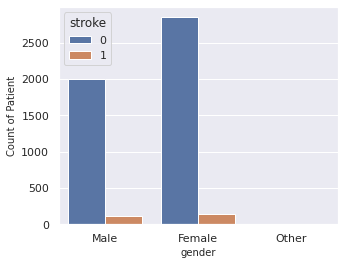

In [16]:
# Explore gender status and stroke probability
print(df['gender'].value_counts())
sns.set(rc={'figure.figsize':(5,4)})
seaborn_plot = sns.countplot(df['gender'], hue = df['stroke'])
seaborn_plot.set_xlabel("gender",fontsize=10)
seaborn_plot.set_ylabel("Count of Patient",fontsize=10);

It seems that females comprise a larger count for both stroke and non-stroke patients.

0    4612
1     498
Name: hypertension, dtype: int64


Text(0, 0.5, 'Count of Patient')

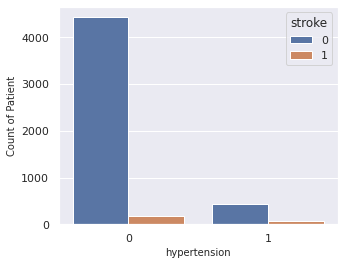

In [17]:
# Analyze hypertension and stroke probability
print(df['hypertension'].value_counts())
sns.set(rc={'figure.figsize':(5,4)})
seaborn_plot = sns.countplot(df['hypertension'], hue = df['stroke'])
seaborn_plot.set_xlabel("hypertension",fontsize=10)
seaborn_plot.set_ylabel("Count of Patient",fontsize=10)

This feature seems to have a minimal influence on probability of stroke.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


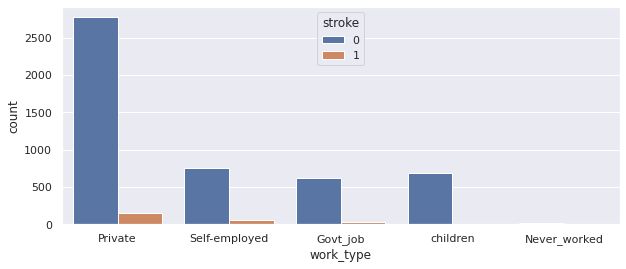

In [18]:
# Explore 'work type' and stroke probability
print(df['work_type'].value_counts())
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(df['work_type'], hue = df['stroke'])

'Work-type' doesn't seem to be a confident indicator of stroke.

Average age of patient:  43


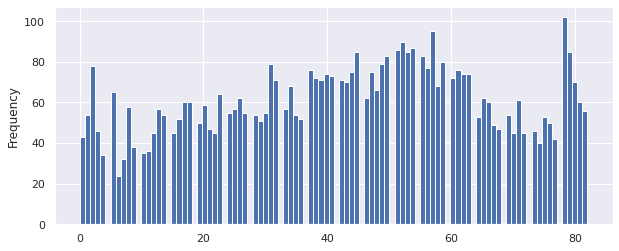

In [19]:
# Determine age profile of dataset
print('Average age of patient: ', int(df.age.mean()))
df.age.plot.hist(bins=100);

The dataset seems pretty evenly distributed in terms of age.

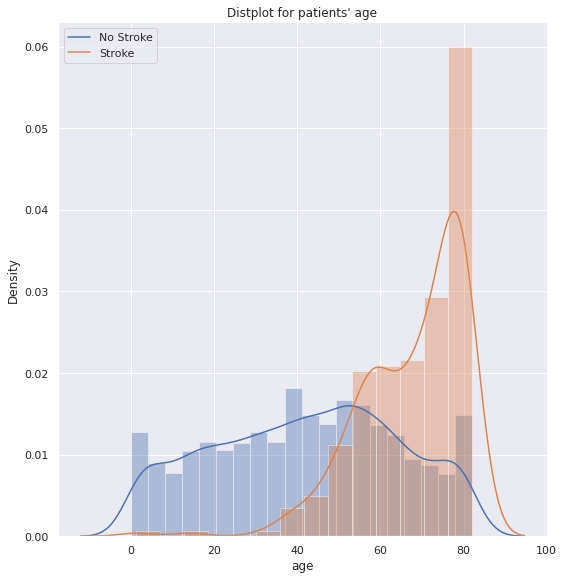

In [20]:
sns.FacetGrid(df, hue="stroke", height = 8).map(sns.distplot, "age")
plt.title("Distplot for patients' age")
plt.legend(['No Stroke','Stroke'])
plt.show()

Age and likelihood of stroke seem to be positively correlated.


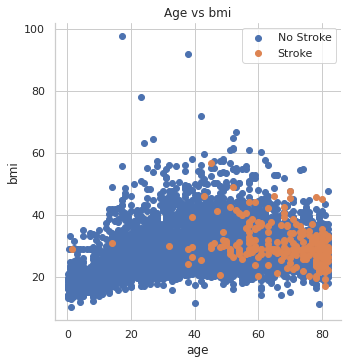

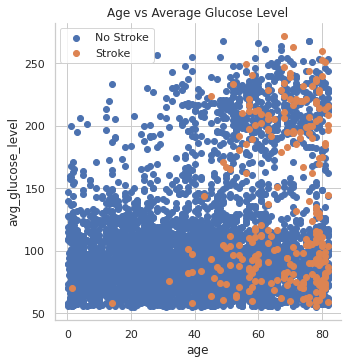

In [21]:
# Explore relationships of numerical features with stroke probability

# Analyze age and bmi of patients in terms of stroke probability
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="stroke", height=5).map(plt.scatter, "age", "bmi")
plt.title('Age vs bmi')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

# Analyze age and average glucose level of patients in terms of stroke probability
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="stroke", height=5).map(plt.scatter, "age", "avg_glucose_level")
plt.title('Age vs Average Glucose Level')
plt.legend(['No Stroke', 'Stroke'])
plt.show()

Based on the graph, 'age' and 'bmi' seem to heavily correlate with stroke probability.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


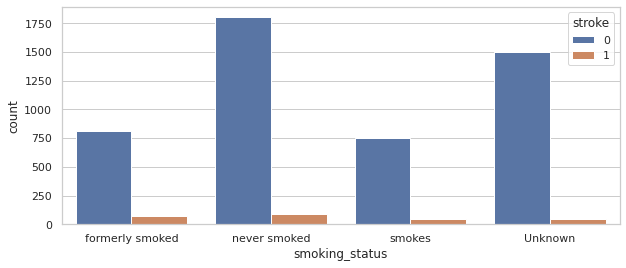

In [22]:
# Compare smoking status with likelihood of stroke
print(df['smoking_status'].value_counts())
sns.countplot(df['smoking_status'], hue = df['stroke'])

Based on the data, smoking status does not seem to have a significant influence on probability of stroke.

### Generate a correlation matrix of features

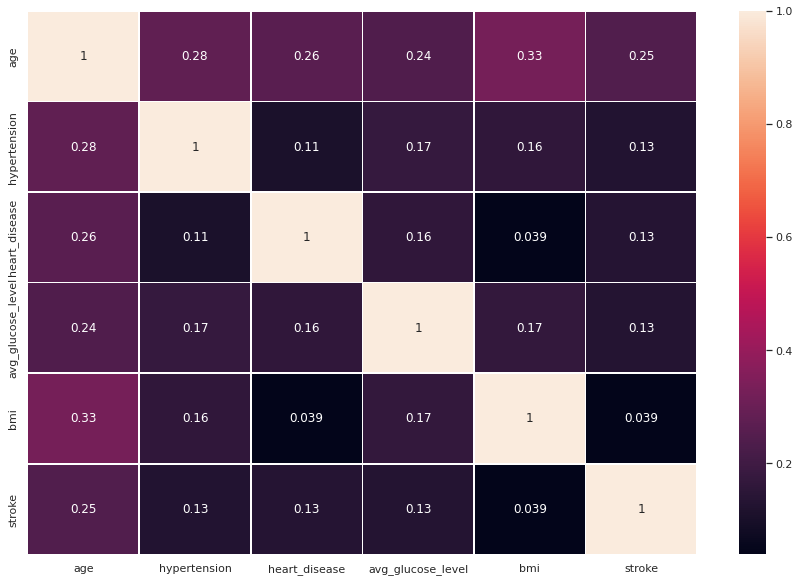

In [23]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 )

Based upon the correlation matrix, it appears that age is the greatest indicator of stroke probability. Additionally, age and body mass index appear to be strongly correlated to one another. 

## Preparing dataset for model fitting

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Several columns must be one-hot encoded:

In [25]:
df=pd.get_dummies(data=df, columns=['gender', 'ever_married','work_type','Residence_type','smoking_status'])


In [26]:
df.head(30)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.000000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
6,74.0,1,1,70.09,27.400000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [27]:
# Redefine features and labels
X = df.drop('stroke', axis=1)
y = df['stroke']

In [28]:
# Create train/test split of data
from sklearn.model_selection import train_test_split
np.random.seed(6)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
# Import Linear SVM module
from sklearn.svm import LinearSVC

# Import other modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
# Instantiate and fit Linear SVC model
model = LinearSVC(verbose=0)

np.random.seed(6)

model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print(model_score)

0.9500978473581213


Without much feature engineering, the model achieves a high accuracy.

In [31]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



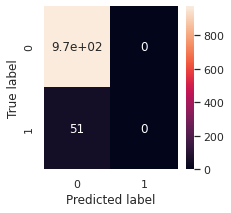

In [32]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
def plot_conf_mat(y_test,y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

plot_conf_mat(y_test,y_pred)

## Utilizing Grid Search CV

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('SVC',LinearSVC())])

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

bestlinearSVC = linearSVC.best_estimator_
bestlinearSVC.fit(X_train,y_train)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(X_train,y_train)

{'SVC__C': 0.01}


0.9515655577299413

Hyperparameter tuning using Grid Search only offers a slight improvement on accuracy.

## Retraining model with a condensed set of features

In [34]:
df_new = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [35]:
df_new = df_new.drop(['id','heart_disease','ever_married','work_type','Residence_type','smoking_status'],axis=1)

In [36]:
# Fill missing 'bmi' values with mean
df_new['bmi'].fillna(value=df_new['bmi'].mean(), inplace=True)

In [37]:
df_new['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [38]:
# One-hot encode 'gender' feature
df_new=pd.get_dummies(data=df_new, columns=['gender'])

In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   avg_glucose_level  5110 non-null   float64
 3   bmi                5110 non-null   float64
 4   stroke             5110 non-null   int64  
 5   gender_Female      5110 non-null   uint8  
 6   gender_Male        5110 non-null   uint8  
 7   gender_Other       5110 non-null   uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 214.7 KB


In [40]:
# Retrain LinearSVC model with a more condensed set of features
# Create a new features and label matrix
X = df_new.drop(['stroke'],axis=1)
y = df_new['stroke']

In [41]:
# Create a new train/test split
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [42]:
# Instantiate and fit the new Linear SVC model
model_new = LinearSVC(verbose=0)

np.random.seed(7)

model_new.fit(X_train, y_train)
model_new_score = model_new.score(X_test, y_test)
print(model_new_score)

0.9510763209393346


The condensed feature matrix conferred a very small increase in model accuracy.